In [1]:
using Revise
using Plots

In [2]:
## load data
using MatrixMarket
data = cd("data/natalia191219") do 
    map(MatrixMarket.mmread, readdir())
    end;

In [3]:
## adjust diagonal to be a proper q matrix
using LinearAlgebra
qs = data
qs = map(qs) do q
    q = q * 0.36
    q .- Diagonal(sum(q, dims=2)|>vec) # mass conservation
end;

# galerkin discretization of the eamc
using EAMC
dt = ones(length(qs))
tmax = length(qs)
g = EAMC.galerkin(qs[1:tmax], dt[1:tmax]);

In [5]:
cs = EAMC.commitors(g, 900)
cc = reshape(cs, 30, 30, 24, 30, 30);

In [11]:
# cluster commitors
ncl = 9
ass=EAMC.optimize_maxassignment(cs[1:900,:], ncl);
cl = cs * ass

21600×9 Array{Float64,2}:
 3.25375e-12  0.039077   1.35525e-6  …  7.91662e-12  0.00336065  0.23944 
 6.29396e-12  0.0387433  1.52862e-6     1.37783e-11  0.00371273  0.233744
 1.25842e-11  0.0383919  1.7785e-6      2.57234e-11  0.00421213  0.226141
 2.73662e-11  0.0383033  2.0256e-6      5.3208e-11   0.00468404  0.219936
 6.58994e-11  0.0384315  2.32629e-6     1.24232e-10  0.0052282   0.213727
 1.69461e-10  0.0388376  2.71218e-6  …  3.14302e-10  0.00587789  0.20737 
 4.6435e-10   0.0395119  3.15495e-6     8.54114e-10  0.00653456  0.202028
 1.36293e-9   0.0403346  3.59691e-6     2.49673e-9   0.00700234  0.199515
 4.23014e-9   0.0413882  4.17055e-6     7.73543e-9   0.00722294  0.20065 
 1.29229e-8   0.0432672  5.53896e-6     2.36163e-8   0.0075092   0.203734
 3.89279e-8   0.0475513  9.4989e-6   …  7.11235e-8   0.00853863  0.206516
 1.1983e-7    0.0578657  2.05373e-5     2.18917e-7   0.0121684   0.202396
 4.7198e-7    0.0861603  5.35367e-5     8.62161e-7   0.0231357   0.189067
 ⋮          

In [12]:
counts = sum(ass, dims=1) |>vec
clmax = argmax(counts) 
# nicht alle cluster werden assigned?!
counts

9-element Array{Float64,1}:
   1.0
   5.0
  43.0
  11.0
  54.0
   3.0
  16.0
 765.0
   2.0

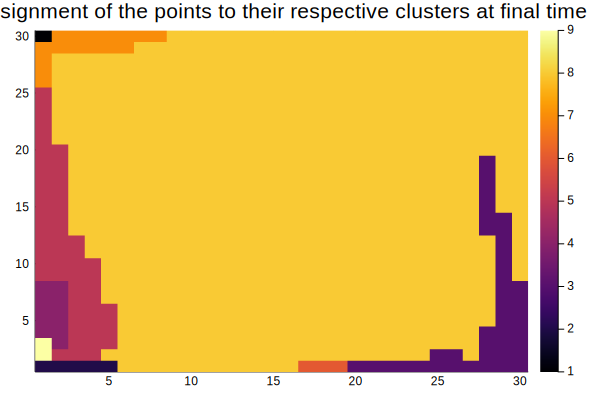

In [13]:
cl = map(i->i[2], argmax(ass, dims=2))
cl = reshape(cl, 30,30)
heatmap(cl, title="assignment of the points to their respective clusters at final time")

In [18]:
using Interact
@manipulate for cluster = slider(1:ncl, value=clmax)
g = @gif for i=0:length(dt)-1
    heatmap(reshape(cs[(1:900).+900*(i),:] * ass[:,cluster], 30, 30), title="density of cluster cl=$cluster at t=$i", clims=(0,1))
    end
    g
end

┌ Info: Saved animation to 
│   fn = /Users/alex/Desktop/code/generators/tmp.gif
└ @ Plots /Users/alex/.julia/packages/Plots/qZHsp/src/animation.jl:98


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 9,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
8, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alex/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010ff72f50, Task (runnable) @0x000000010ff72f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"9498783564573776196\",\"id\":\"ob_42\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"94987835645737761

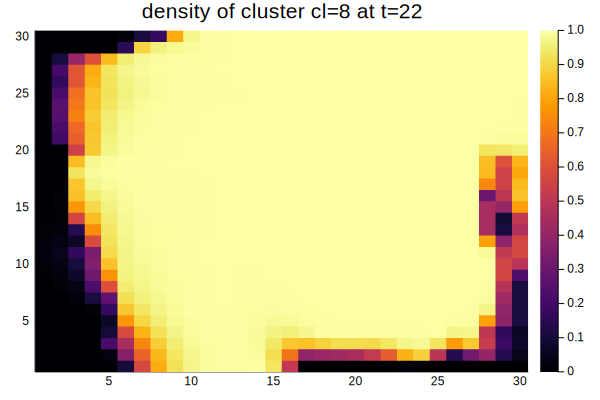

In [15]:
let i = 22
heatmap(reshape(cs[(1:900).+900*(i),:] * ass[:,clmax], 30, 30), title="density of cluster cl=$clmax at t=$i", clims=(0,1))
end